predict: 0.96


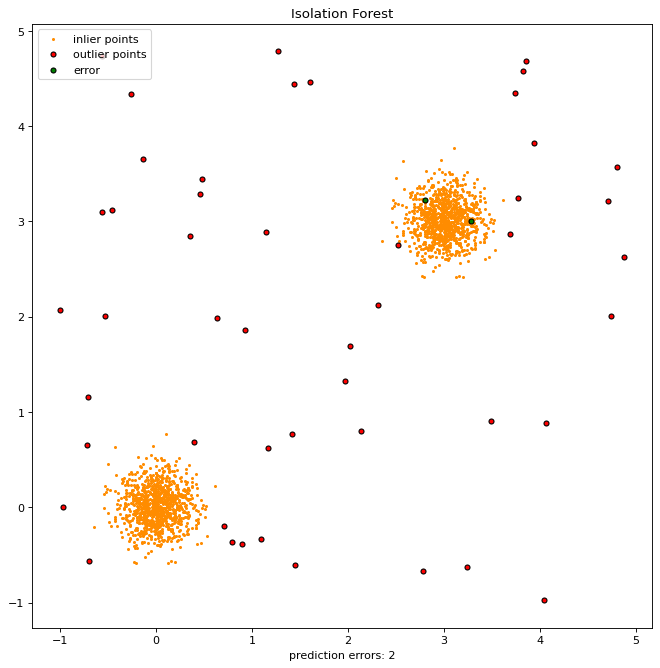

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from matplotlib.pyplot import figure

np.random.seed(42)

# Generate train data
X_inliers = 0.2 * np.random.randn(1000, 2)
X_inliers = np.r_[X_inliers + 3, X_inliers]
X_inliers = pd.DataFrame(X_inliers, columns=['x1', 'x2'])

# Generate some outliers
X_outliers = np.random.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=['x1', 'x2'])

# fit the model
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
clf.fit(X_inliers.to_numpy())

y_pred_outliers = clf.predict(X_outliers.to_numpy())
X_outliers = X_outliers.assign(y=y_pred_outliers)
print('predict:', list(y_pred_outliers).count(-1) / y_pred_outliers.shape[0])

figure(num=None, figsize=(10, 10), dpi=80, facecolor='white', edgecolor='k')

plt.title('Isolation Forest')
plt.xlabel('prediction errors: %d' % (list(y_pred_outliers).count(1)))

plt.scatter(X_inliers.x1, X_inliers.x2, color='darkorange', s=3., label='inlier points')
plt.scatter(X_outliers.loc[-1 == X_outliers.y, ['x1']], 
            X_outliers.loc[-1 == X_outliers.y, ['x2']], 
            color='red', s=20., edgecolor='k', label='outlier points')
plt.scatter(X_outliers.loc[1 == X_outliers.y, ['x1']], 
            X_outliers.loc[1 == X_outliers.y, ['x2']], 
            color='green', s=20., edgecolor='k', label='error')

legend = plt.legend(loc='upper left')
plt.show()